<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('/content/drive/MyDrive/AAIC/Case-studies/Case Study 3:Facebook Friend Recommendation using Graph Mining/Practice/data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('/content/drive/MyDrive/AAIC/Case-studies/Case Study 3:Facebook Friend Recommendation using Graph Mining/Practice/data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [4]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [5]:
df_final_test.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [6]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [7]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

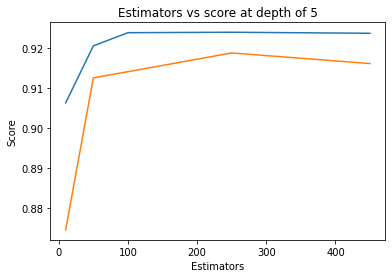

In [ ]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


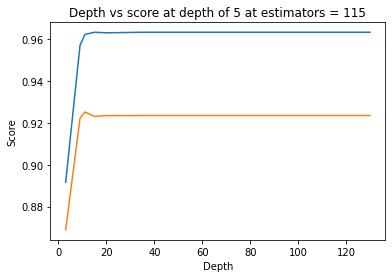

In [ ]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25,return_train_score=True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96225042 0.96215492 0.9605708  0.96194014 0.96330005]
mean train scores [0.96294922 0.96266735 0.96115674 0.96263457 0.96430539]


In [ ]:
list(rf_random.cv_results_.keys())

In [ ]:
print(rf_random.best_estimator_)

In [ ]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [ ]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [ ]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


In [41]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


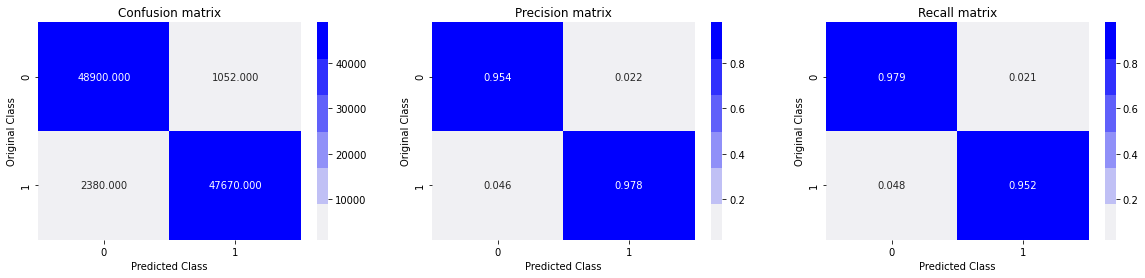

Test confusion_matrix


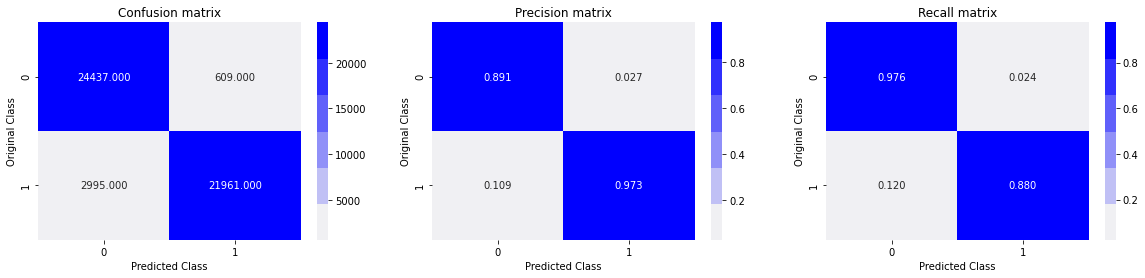

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

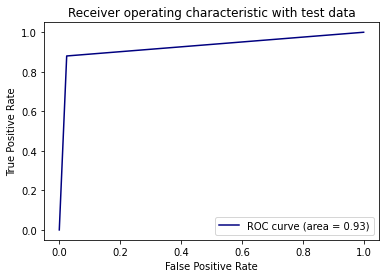

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

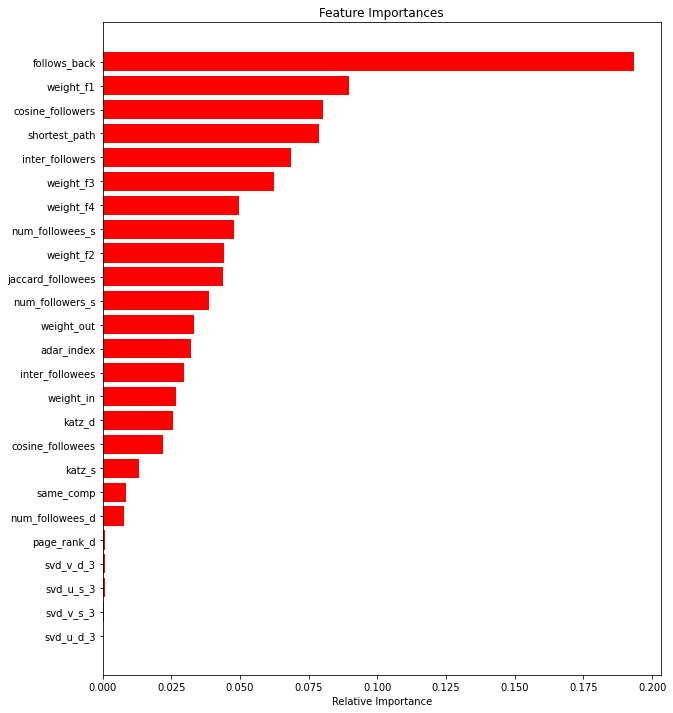

In [ ]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

# CODE


In [8]:
from tqdm import tqdm_notebook as tqdm
from scipy.sparse.linalg import svds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading

from pandas import read_hdf
df_final_train = read_hdf('/content/drive/MyDrive/AAIC/Case-studies/Case Study 3:Facebook Friend Recommendation using Graph Mining/Practice/data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('/content/drive/MyDrive/AAIC/Case-studies/Case Study 3:Facebook Friend Recommendation using Graph Mining/Practice/data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [ ]:
G = nx.read_edgelist('/content/drive/MyDrive/AAIC/Case-studies/Case Study 3:Facebook Friend Recommendation using Graph Mining/Practice/data/after_eda/train_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)

In [ ]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 1862196
Number of edges: 15100030
Average in degree:   8.1087
Average out degree:   8.1087


In [ ]:

def Preferential_Attachment_followee(a,b):
  try:
    if len(set(G.successors(a))) == 0 | len(set(G.successors(b)))==0:
      print(len(set(G.successors(a))),len(set(G.successors(b))))
      return 0
    sim = len(set(G.successors(a)))*len(set(G.successors(b)))
  except:
    return 0
  return sim


def Preferential_Attachment_followers(a,b):
  try:
    if len(set(G.predecessors(a))) == 0 | len(set(G.predecessors(b)))==0:
      return 0
    sim = len(set(G.predecessors(a)))*len(set(G.predecessors(b)))
  except:
    return 0
  return sim



In [ ]:
df_final_train['Preferential_Attachment_followee'] = tqdm(df_final_train.apply(lambda row:Preferential_Attachment_followee(row['source_node'],row['destination_node']),axis=1))

In [ ]:
df_final_train['Preferential_Attachment_followers'] = tqdm(df_final_train.apply(lambda row:Preferential_Attachment_followers(row['source_node'],row['destination_node']),axis=1))

In [ ]:
df_final_test['Preferential_Attachment_followee'] = tqdm(df_final_test.apply(lambda row:Preferential_Attachment_followee(row['source_node'],row['destination_node']),axis=1))


In [ ]:
df_final_test['Preferential_Attachment_followers'] = tqdm(df_final_test.apply(lambda row:Preferential_Attachment_followers(row['source_node'],row['destination_node']),axis=1))

In [ ]:
#for svd features to get feature vector creating a dict node val and index in svd vector
sadj_col = sorted(G.nodes())
sadj_dict = { val:idx for idx,val in enumerate(sadj_col)}
Adj = nx.adjacency_matrix(G,nodelist=sorted(G.nodes())).asfptype()


In [ ]:
U, s, V = svds(Adj, k = 6)
print('Adjacency matrix Shape',Adj.shape)
print('U Shape',U.shape)
print('V Shape',V.shape)
print('s Shape',s.shape)


Adjacency matrix Shape (1862196, 1862196)
U Shape (1862196, 6)
V Shape (6, 1862196)
s Shape (6,)


In [ ]:
def svd_dot(U,V,sadj_dict,data):
  data['svd_U'] = 0
  data['svd_V'] = 0
  #for i in tqdm(range(data.shape[0])):
    #sn = data['source_node'].iloc[i]
    #dn = data['destination_node'].iloc[i]
  for i in tqdm(range(data.shape[0])):
    try:
      sn = data['source_node'].iloc[i]
      dn = data['destination_node'].iloc[i]
      data['svd_U'].iloc[i] = np.dot(U[sadj_dict[sn]],U[sadj_dict[dn]])
      data['svd_V'].iloc[i] = np.dot(V.T[sadj_dict[sn]],V.T[sadj_dict[dn]])
    except:
      data['svd_U'].iloc[i],data['svd_V'].iloc[i] = 0,0
  return data
  
      

In [ ]:
df_final_train = svd_dot(U,V,sadj_dict,df_final_train)

In [ ]:
df_final_test = svd_dot(U,V,sadj_dict,df_final_test)

In [ ]:
# After appending the additional features, Storing them in Preferential_Attachment_svd_tr.h5 and 
# Preferential_Attachment_svd_ts.h5 files to avoid further computation.

hdf = HDFStore('/content/drive/MyDrive/AAIC/Case-studies/Case Study 3:Facebook Friend Recommendation using Graph Mining/Practice/Preferential_Attachment_svd_ts.h5')
#hdf.put('train_df',df_final_train, format='table', data_columns=True)
hdf.put('test_df',df_final_test, format='table', data_columns=True)
hdf.close()

In [9]:
# importing the data with additional features i.e 
# [ 'Preferential_Attachment_followee', 'Preferential_Attachment_followers','svd_U', 'svd_V' ] 
# from Preferential_Attachment_svd_tr.h5 and Preferential_Attachment_svd_ts.h5 files.
from pandas import read_hdf
df_final_train = read_hdf('/content/drive/MyDrive/AAIC/Case-studies/Case Study 3:Facebook Friend Recommendation using Graph Mining/Practice/Preferential_Attachment_svd_tr.h5', 'train_df',mode='r')
df_final_test = read_hdf('/content/drive/MyDrive/AAIC/Case-studies/Case Study 3:Facebook Friend Recommendation using Graph Mining/Practice/Preferential_Attachment_svd_ts.h5', 'test_df',mode='r')

In [10]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [11]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'Preferential_Attachment_followee', 'Preferential_Attachment_followers',
       'svd_U', 'svd_V'],
      dtype='object')

In [12]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [13]:
df_final_train.columns

Index(['jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'Preferential_Attachment_followee', 'Preferential_Attachment_followers',
       'svd_U', 'svd_V'],
      dtype='object')

In [ ]:
#from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
clf = xgb.XGBClassifier()

param = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
         'n_estimators':[10,50,100,250,450]}

from sklearn.model_selection import GridSearchCV
model = GridSearchCV(estimator=clf,param_grid=param,cv=10,return_train_score=True,verbose=10,n_jobs=-1,scoring='f1')

In [ ]:
model.fit(df_final_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 64.5min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 68.0min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 83

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                         'n_estimators': [10, 50, 100, 250, 450]},
             pre_dispatch='2*n_

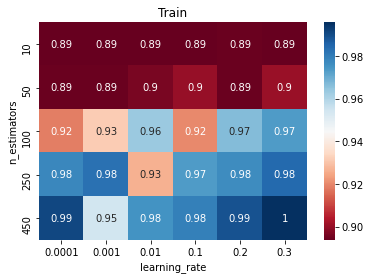

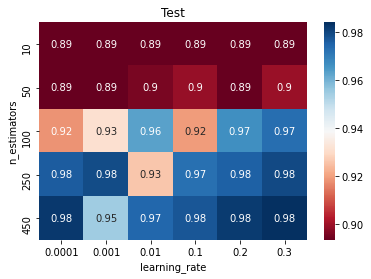

In [ ]:
x,y,z = param['n_estimators'],param['learning_rate'],model.cv_results_['mean_train_score']
import itertools
import seaborn as sns
plot_data = pd.DataFrame(list(itertools.product(x,y)),columns=['n_estimators','learning_rate'])
plot_data['f1_Train'] = z
plot_data['f1_Test'] = model.cv_results_['mean_test_score']

#plot_data['tr_cl']= '#EF553B'
#plot_data['ts_cl']= '#FF6692'

# https://stackoverflow.com/questions/45470882/x-y-z-array-data-to-heatmap/45660022

pivotted_tr= plot_data.pivot('n_estimators','learning_rate','f1_Train')
sns.heatmap(pivotted_tr,cmap='RdBu',annot=True)
plt.title('Train')
plt.show()

pivotted_ts= plot_data.pivot('n_estimators','learning_rate','f1_Test')
sns.heatmap(pivotted_ts,cmap='RdBu',annot=True)
plt.title('Test')
plt.show()

In [ ]:
model.best_params_

{'learning_rate': 0.3, 'n_estimators': 450}

In [ ]:
final_clf = xgb.XGBClassifier(learning_rate=model.best_params_['learning_rate'],
                               n_estimators=model.best_params_['n_estimators'])


final_clf.fit(df_final_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=450, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_train_pred = final_clf.predict(df_final_train)

y_test_pred = final_clf.predict(df_final_test)

In [ ]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9953565638572544
Test f1 score 0.8817707873111248


Here considered only two hyper-parameters i.e {'learning_rate': 0.3, 'n_estimators': 450 as best param's}
we get f1_score as 

Train f1 score 0.9953565638572544


Test f1 score 0.8817707873111248

Train confusion_matrix


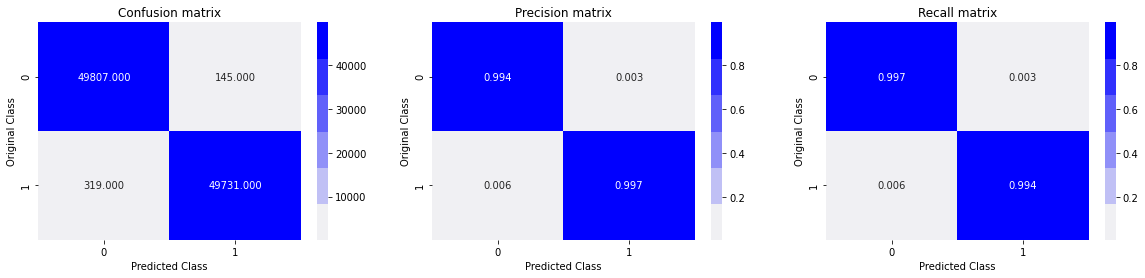

Test confusion_matrix


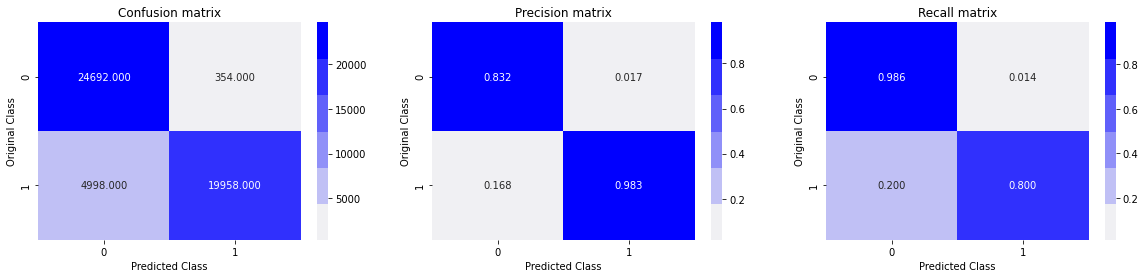

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

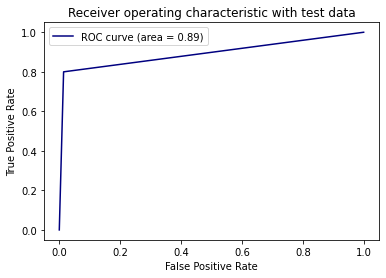

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

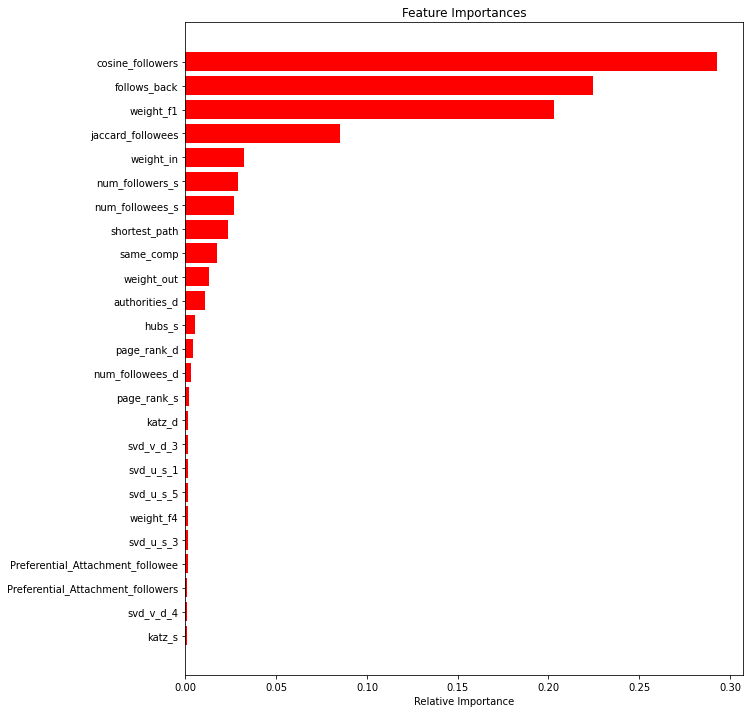

In [ ]:
features = df_final_train.columns
importances = final_clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Additional Features [ 'Preferential_Attachment_followee', 'Preferential_Attachment_followers'] found to be less Importance from the above plot and features  ['svd_U', 'svd_V' ] are not at all seen in above Feature Importance plot

# New section

Trying with different parameters 

In [23]:
#from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
clf = xgb.XGBClassifier()

param = {'learning_rate': sp_randint(10**(-3),10**(2)),
         'n_estimators':sp_randint(100,2000),
         }

from sklearn.model_selection import GridSearchCV
#model_ = GridSearchCV(estimator=clf,param_grid=param,cv=5,return_train_score=True,verbose=10,n_jobs=-1,scoring='f1')

In [24]:
from sklearn.model_selection import RandomizedSearchCV
model_ = RandomizedSearchCV(estimator=clf,param_distributions=param,cv=5,return_train_score=True,verbose=10,n_jobs=-1,scoring='f1')

In [25]:
model_.fit(df_final_train,y_train)
print(model_.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 55.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 56.3min finished


{'learning_rate': 1, 'n_estimators': 516}


In [26]:
final_clf_ = xgb.XGBClassifier(learning_rate=model_.best_params_['learning_rate'],
                               n_estimators=model_.best_params_['n_estimators'])


final_clf_.fit(df_final_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
              n_estimators=516, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [27]:
y_train_pred = final_clf_.predict(df_final_train)

y_test_pred = final_clf_.predict(df_final_test)

from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 1.0
Test f1 score 0.8679051718370169


Not the Best score

In [28]:
print('mean test scores',model_.cv_results_['mean_test_score'])
print('mean train scores',model_.cv_results_['mean_train_score'])

mean test scores [0.98264036 0.40026658 0.40026213 0.40025769 0.66710207 0.
 0.66710207 0.         0.53368432 0.26684439]
mean train scores [1.         0.40025991 0.40026102 0.40026213 0.66710207 0.
 0.66710207 0.         0.53368099 0.26683994]


#XGBoost with 4 Hyper-parameters

In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(124,200),
              "max_depth": sp_randint(15,20),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',return_train_score=True,verbose=100)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

In [36]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=36, min_samples_split=162,
                       min_weight_fraction_leaf=0.0, n_estimators=135,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


In [37]:
mod = rf_random.best_estimator_
mod.fit(df_final_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=36, min_samples_split=162,
                       min_weight_fraction_leaf=0.0, n_estimators=135,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [38]:
y_train_pred = mod.predict(df_final_train)
y_test_pred = mod.predict(df_final_test)
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9646130759247242
Test f1 score 0.9263653959437852


Comparitavely this score seems to good from previously computed one's

Train confusion_matrix


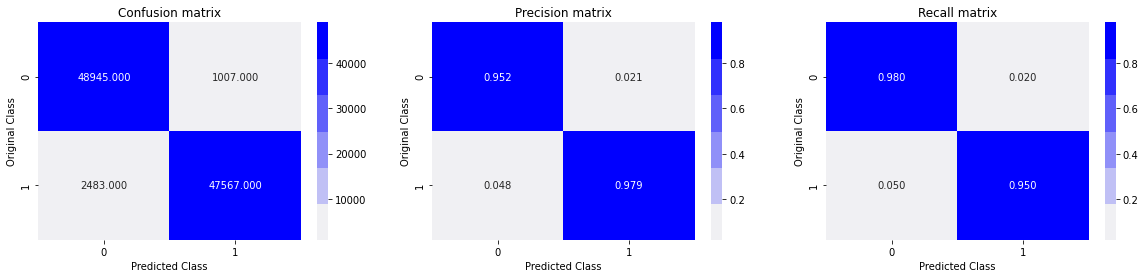

Test confusion_matrix


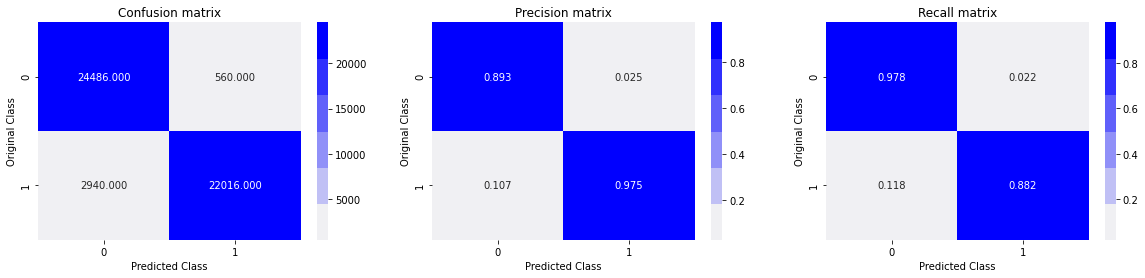

In [42]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

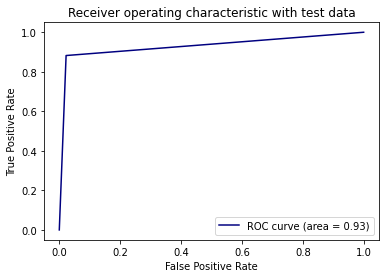

In [43]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

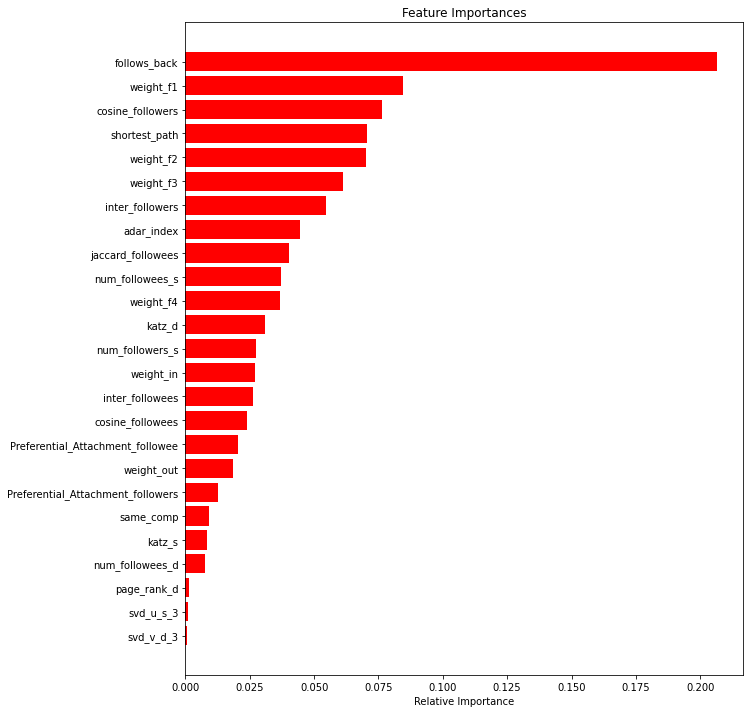

In [45]:
features = df_final_train.columns
importances = mod.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Additional Features [ 'Preferential_Attachment_followee', 'Preferential_Attachment_followers'] found to be given Importance from the above plot and features  ['svd_U', 'svd_V' ] are not at all seen in above Feature Importance plot

In [46]:
rf_random.best_params_

{'max_depth': 17,
 'min_samples_leaf': 36,
 'min_samples_split': 162,
 'n_estimators': 135}